## 5.1 Understanding Image 
Let us look at some of the important Image operations in Python. The most important operations for Image is reading and writing. So lets start with that. We will be using PIL Library to do most of the Image related operations.
#### 5.1.1 Reading an Image

(350, 590, 3)


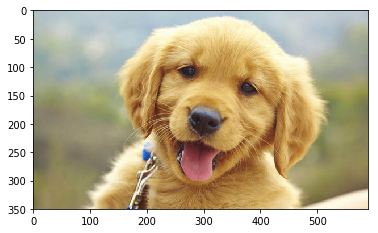

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
path = 'img/dog.jpeg'
img = Image.open(path)
img = np.array(img)
print (img.shape)
plt.imshow(img)

### 5.1.2 Plotting RGB Channels of the Image seperately

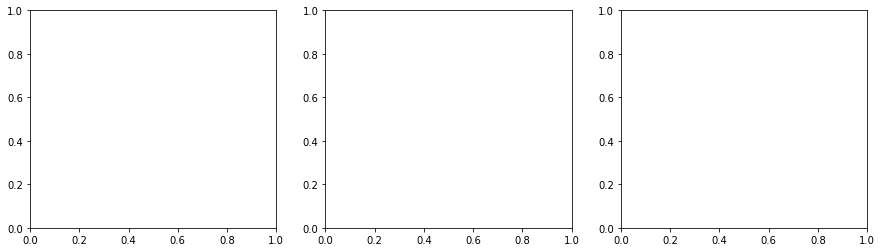

In [14]:
fig,ax = plt.subplots(nrows = 1,ncols=3, figsize=(15,4))

(-0.5, 589.5, 349.5, -0.5)

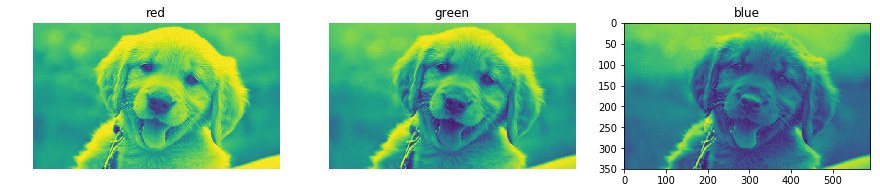

In [21]:
fig,ax = plt.subplots(nrows = 1,ncols=3, figsize=(15,4))
rimg,gimg,bimg = img[:,:,0],img[:,:,1],img[:,:,2]
#Red Channel
ax[0].imshow(rimg)
ax[0].set_title('red')
ax[0].axis('off')
#Green Channel
ax[1].imshow(gimg)
ax[1].set_title('green')
ax[1].axis('off')
#Blue Channel
ax[2].imshow(bimg)
ax[2].set_title('blue')
ax[1].axis('off')


### 5.3 RGB to Grayscale

(-0.5, 589.5, 349.5, -0.5)

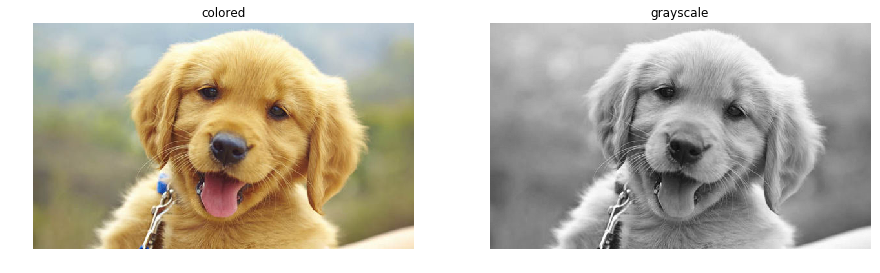

In [28]:
fig,ax = plt.subplots(nrows = 1,ncols=2, figsize=(15,7))
#Color Image
ax[0].imshow(img)
ax[0].set_title('colored')
ax[0].axis('off')
#Grayscale Image
ax[1].imshow(np.array(Image.fromarray(img).convert('L')),cmap='gray')
ax[1].set_title('grayscale')
ax[1].axis('off')

### 5.4 Flipping an Image

(-0.5, 589.5, 349.5, -0.5)

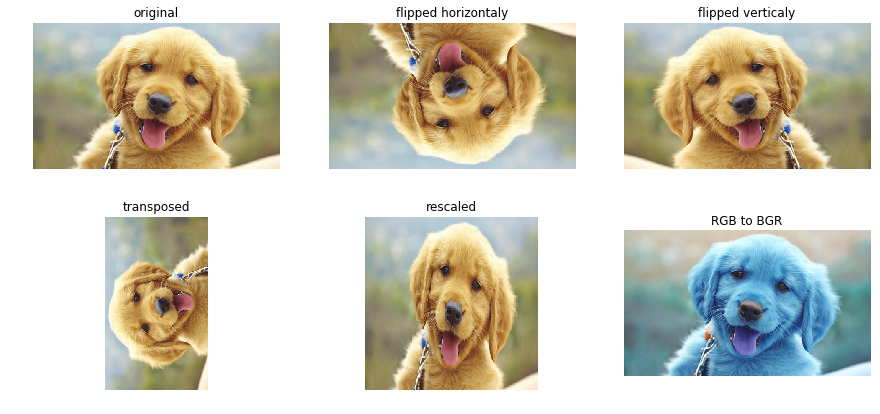

In [42]:
fig,ax = plt.subplots(nrows = 2,ncols=3, figsize=(15,7))
#Color Image
ax[0][0].imshow(img)
ax[0][0].set_title('original')
ax[0][0].axis('off')
#Grayscale Image
ax[0][1].imshow(img[::-1,:,:])
ax[0][1].set_title('flipped horizontaly')
ax[0][1].axis('off')
ax[0][2].imshow(img[:,::-1,:])
ax[0][2].set_title('flipped  verticaly')
ax[0][2].axis('off')
# Rotation and Flipping
ax[1][0].imshow(np.transpose(img,axes=[1,0,2]))
ax[1][0].set_title('transposed')
ax[1][0].axis('off')
#Grayscale Image
img2 = np.array(Image.fromarray(img).resize([256,256]))
ax[1][1].imshow(img2)
ax[1][1].set_title('rescaled')
ax[1][1].axis('off')
ax[1][2].imshow(img[:,:,::-1])
ax[1][2].set_title('RGB to BGR')
ax[1][2].axis('off')



## 5.5 Applying custom Filters

In [112]:
# Apply custom filters
from scipy import ndimage
import numpy as np

myblur = np.ones((10,10))/100
edge1 = [-2,-1,0,1,2]
myedge = np.array([edge1,edge1,edge1,edge1,edge1])/100
print (myedge)


[[-0.02 -0.01  0.    0.01  0.02]
 [-0.02 -0.01  0.    0.01  0.02]
 [-0.02 -0.01  0.    0.01  0.02]
 [-0.02 -0.01  0.    0.01  0.02]
 [-0.02 -0.01  0.    0.01  0.02]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(-0.5, 589.5, 349.5, -0.5)

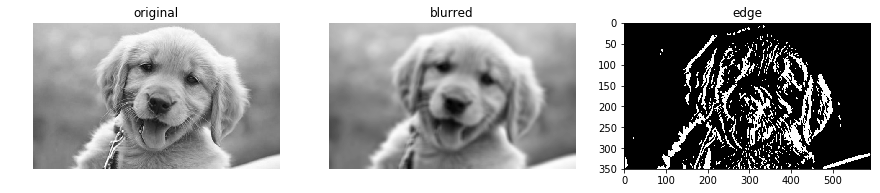

In [114]:
grayimg = np.array(Image.fromarray(img).convert('L'))
blurred = ndimage.convolve(grayimg, myblur)
edge = ndimage.convolve(grayimg, myedge)
print (edge)
edge[np.where(edge<200)]=0

fig,ax = plt.subplots(nrows = 1,ncols=3, figsize=(15,4))
rimg,gimg,bimg = img[:,:,0],img[:,:,1],img[:,:,2]
#Red Channel
ax[0].imshow(grayimg,cmap='gray')
ax[0].set_title('original')
ax[0].axis('off')
#Green Channel
ax[1].imshow(blurred,cmap='gray')
ax[1].set_title('blurred')
ax[1].axis('off')
#Blue Channel
ax[2].imshow(edge,cmap='gray')
ax[2].set_title('edge')
ax[1].axis('off')


## How to create Dataset from a Generator for Finetuning 

In [1]:
import pandas as pd
import os;
import numpy as np;
from PIL import Image
import tensorflow as tf;


train_prefix = '/home/jaley/Downloads/all/train'
test_prefix = '/home/jaley/Downloads/all/test1'
def train_gen():
    prefix = train_prefix
    for filename in os.listdir(prefix):
        label = np.zeros((2,))
        if filename.startswith('dog'):                    
            path = prefix + '/'+filename
            label[1]=1
        if filename.startswith('cat'):                    
            path = prefix + '/'+filename
            label[0]=1
        yield  np.array(Image.open(path).resize((224,224)),dtype='float64').transpose((2,0,1))/255,label;


In [2]:
train_ds = tf.data.Dataset.from_generator(train_gen,
                                    output_types=(tf.float64,tf.float64),
                                    output_shapes=((3,224,224),(2,) ))

In [3]:
train_var = train_ds.repeat(10).shuffle(1000).batch(10).make_one_shot_iterator().get_next()

In [4]:
with tf.Session() as sess:
    dt,lbl = sess.run(train_var)
    print (dt.shape,lbl)
    

(10, 3, 224, 224) [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [5]:
with tf.Session() as sess:
    for i in range(10):
        dt,lbl = sess.run(train_var)
        print (dt.shape,lbl.shape)

(10, 3, 224, 224) (10, 2)
(10, 3, 224, 224) (10, 2)
(10, 3, 224, 224) (10, 2)
(10, 3, 224, 224) (10, 2)
(10, 3, 224, 224) (10, 2)
(10, 3, 224, 224) (10, 2)
(10, 3, 224, 224) (10, 2)
(10, 3, 224, 224) (10, 2)
(10, 3, 224, 224) (10, 2)
(10, 3, 224, 224) (10, 2)


## Using Decorators

In [6]:
def testfunc(func):
    for i in range(10):
        yield i
    
@testfunc
def train_func():
    return 'train_prefix'

In [7]:
for elem in train_func:
    print (elem)

0
1
2
3
4
5
6
7
8
9


In [8]:
import os;
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt;
import tensorflow as tf;
from random import shuffle

def get_dataset(epoch,batchsize, test_batchsize):
    """
    Get the (data,label) pair
    """

    test_prefix = '/home/jaley/Downloads/all/test1'
    def my_gen():
        prefix = '/home/jaley/Downloads/all/train'
        filelist = [filename for filename in os.listdir(prefix)]
        shuffle(filelist)
        for filename in filelist:
            filename=str(filename)
            label = np.zeros((2,))
            if filename.startswith('dog'):                    
                path = prefix + '/'+filename
                label[1]=1.0
                img = np.array(Image.open(path).resize((224,224)),dtype='uint8')
                yield  img,label;
            if filename.startswith('cat'):                    
                path = prefix + '/'+filename
                label[0]=1.0
                img = np.array(Image.open(path).resize((224,224)),dtype='uint8')
                yield  img,label;
                
    train_ds = tf.data.Dataset.from_generator(my_gen,output_types=(tf.float32,tf.float32),output_shapes=((224,224,3),(2,)))
    test_ds = tf.data.Dataset.from_generator(my_gen,output_types=(tf.float32,tf.float32),output_shapes=((224,224,3),(2,)))
    train_ds = train_ds.repeat(epoch).batch(batchsize)
    test_ds = test_ds.repeat(epoch).batch(test_batchsize)
    return train_ds,test_ds;

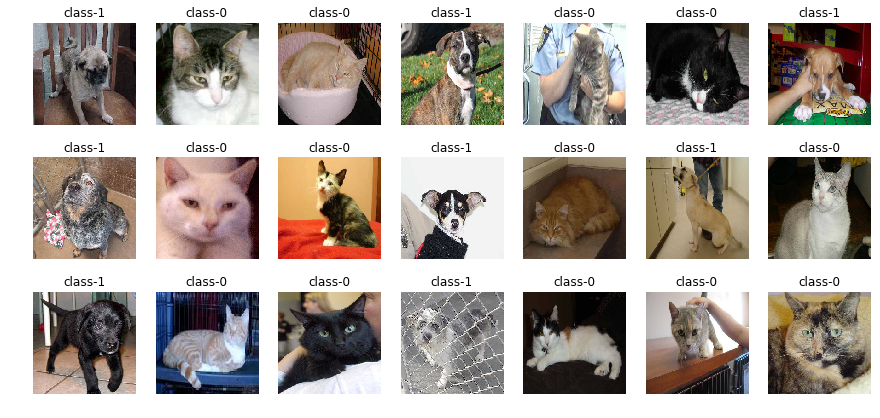

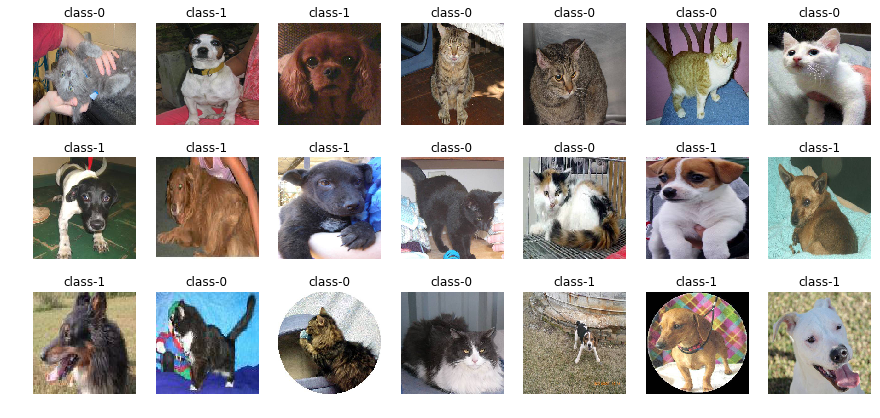

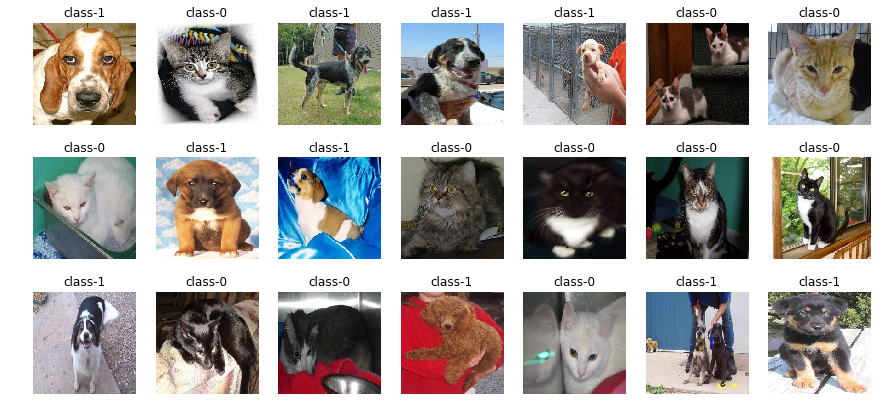

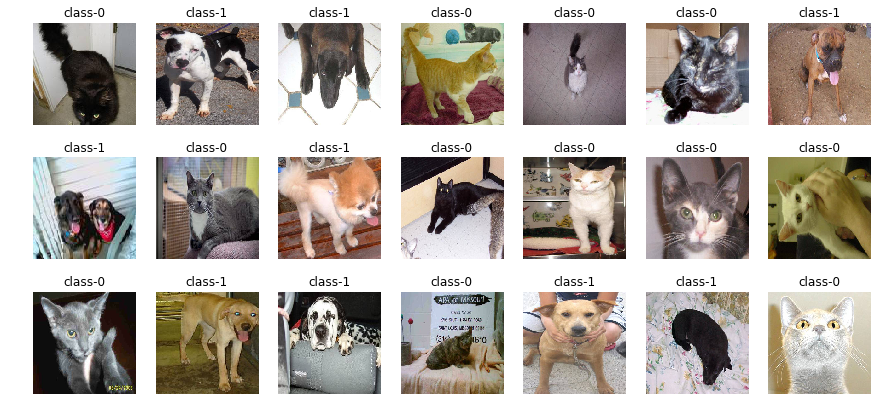

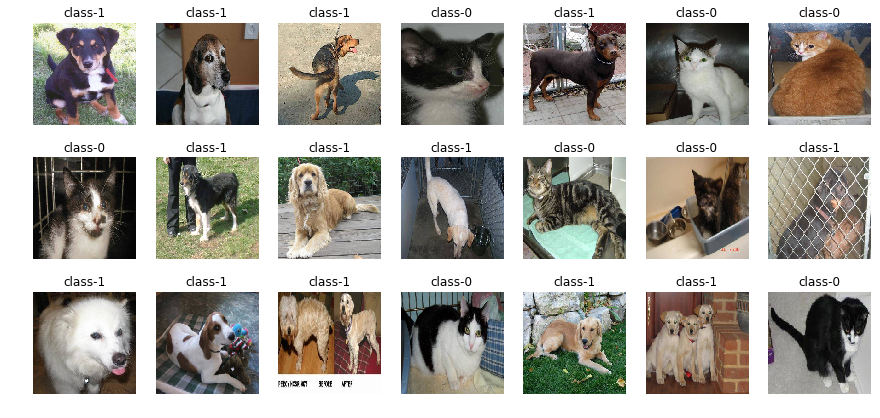

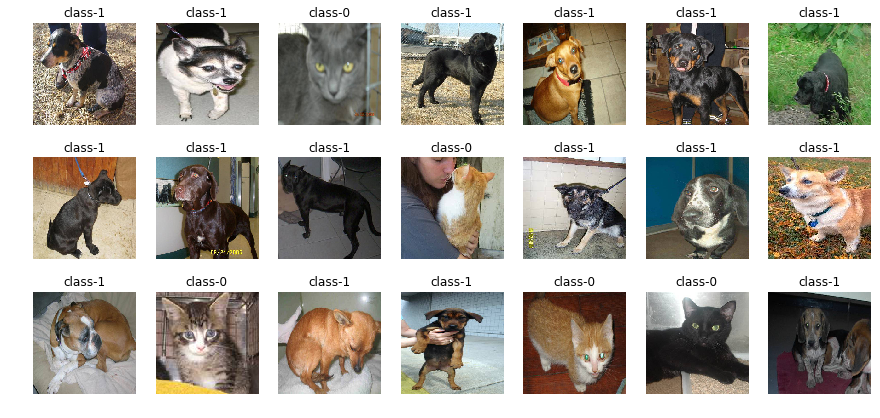

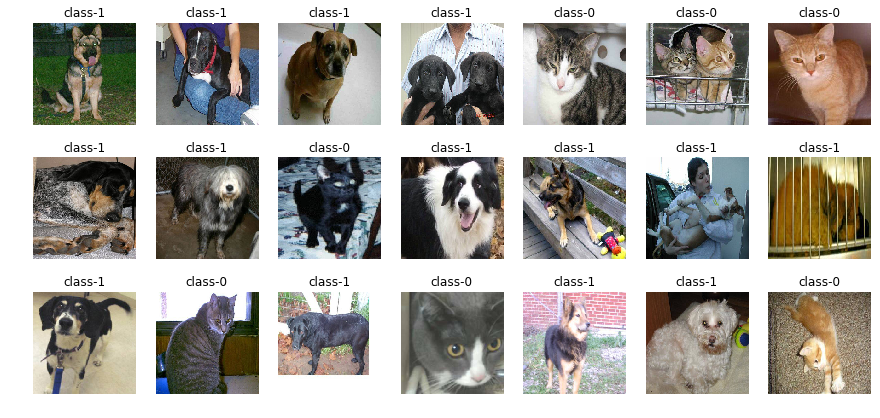

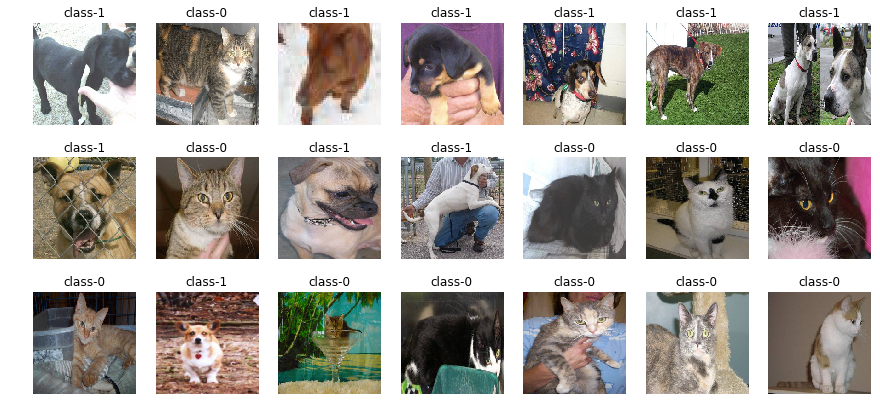

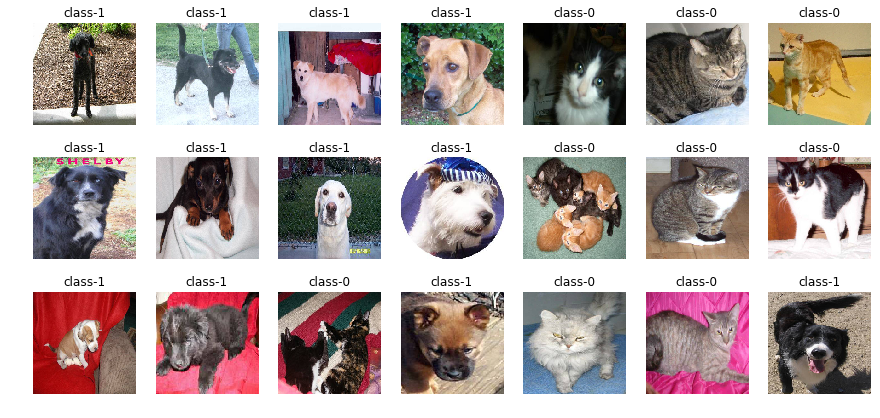

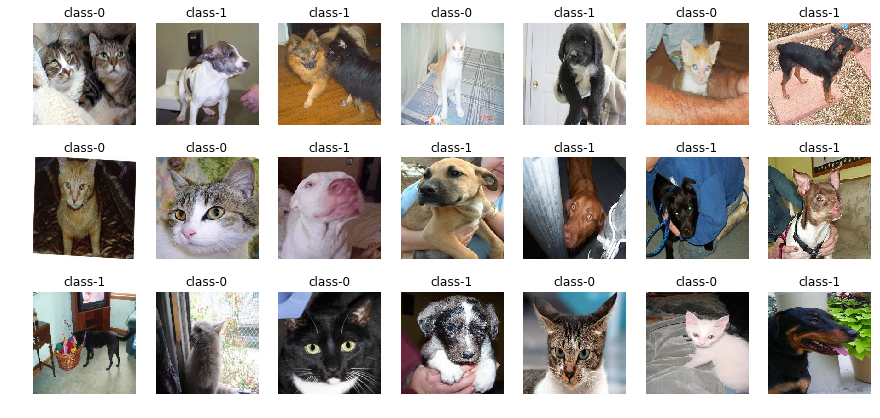

In [10]:
train_ds,test_ds = get_dataset(1,21,5)
dt,lbl = train_ds.make_one_shot_iterator().get_next()
indices = [(i,j) for i in range(3) for j in range(7)]


with tf.Session() as sess:
    for j in range(10):
        i=0
        fig,ax = plt.subplots(nrows=3,ncols=7,figsize=(15,7))
        _dt,_lbl = sess.run([dt,lbl])
        for i in range(21):
            ax[indices[i][0],indices[i][1]].imshow(np.array(_dt[i],dtype=np.uint8))
            ax[indices[i][0],indices[i][1]].axis('off')
            ax[indices[i][0],indices[i][1]].set_title('class-'+str(np.argmax(_lbl[i])))
        plt.show()
